# Kaggle - Bike Sharing Demand_3

In [1]:
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv")

print(train.shape)

train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("data/test.csv")

print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### 1. Parse datetime

In [4]:
train["datetime"] = pd.to_datetime(train["datetime"])

train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [5]:
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


## Explore

In [6]:
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

### 1. datetime

### 1-1) 시각화를 하기 전 예상

1. 분(```Dates-minute```), 초(```Dates-second```)는 별 영향이 없을 가능성이 높음.

2. 일(```Dates-day```)의 경우 28일까지만 있는 달도 있으며, 31일 또한 한해 절반 정도 밖에 차지 하지 않으로 일 자체도 크게 영향을 주지는 않을것 같음.

3. 하지만 날씨와 연관지어 생각하거나 새벽이나 밤중에는 많이 빌리지 않을 수도 있음.

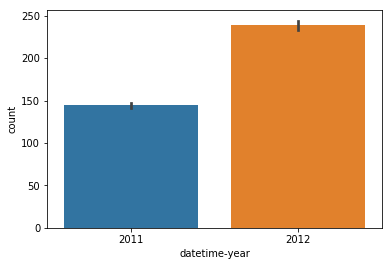

In [7]:
# 연도별 대여량
sns.barplot(data=train, x="datetime-year", y="count")

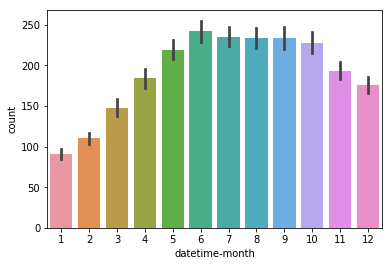

In [8]:
# 월별 대여량
sns.barplot(data=train, x="datetime-month", y="count")

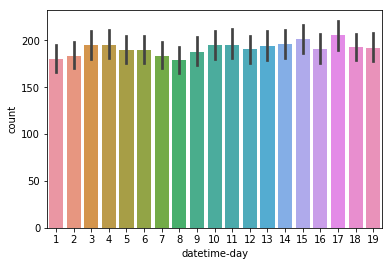

In [9]:
# 일별 대여량
sns.barplot(data=train, x="datetime-day", y="count")

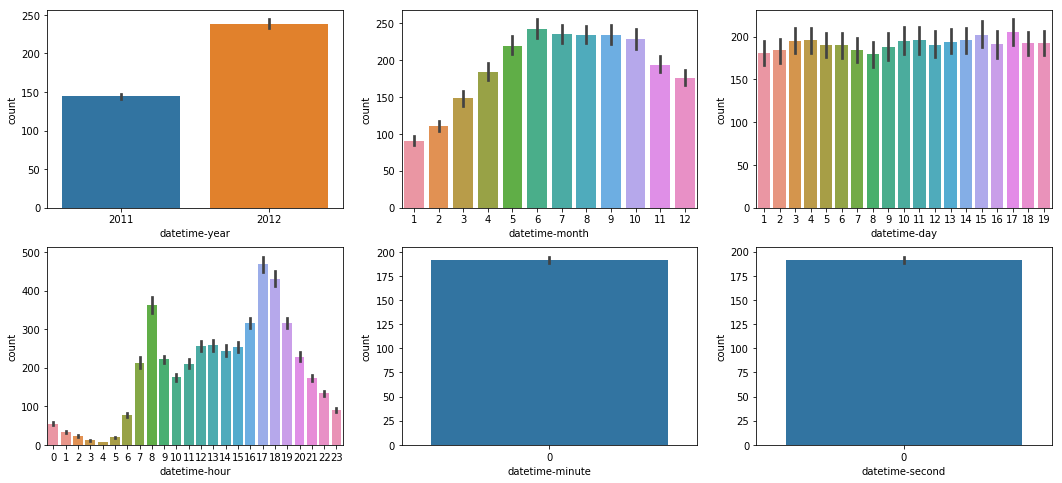

In [10]:
# 모든 요소를 모아서 한번에 보기
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

### 1-2) 이 시각화로 발견할 수 있는 사실

1. datetime-year
  * 2011년도의 자전거 대여량보다 2012년도의 자전거 대여량이 더 높은것을 보면 꾸준히 성장하는 회사 임을 짐작할 수 있음.

2. datetime-month
  * 6~8월, 계절상으로는 여름에 자전거를 많이 빌리며, 12~2월, 계절상으로는 겨울에는 자전거를 많이 빌리지 않음.
  
3. datetime-day
  * x축에 19일까지만 존재함. 나머지 20일부터는 test 데이터에 있으므로 이것만 가지고는 알 수 없음.

4. datetime-hour**
  * 새벽 시간 보다는 오후 시간에 상대적으로 자전거를 많이 빌림.
  * 7~9시와 16시~19시에 많이 빌림.
  
5. datetime-minute** & **datetime-second**
  * 의미 없는 데이터

### 1-3) 예측 모델 계선 가능성

1. (```datetime-minute```)과 초(```datetime-second```)는 사용할 필요가 없음.
2. (```datetime-day```) 컬럼이 19일로 끝이나기 때문에 feature로 쓰기는 부적합 함.
3. (```workingday```) 7~9시와 16시~19시를 표현 해주고 있음.

### 2. weather

### 2-1) 시각화를 하기 전 예상

1. 안 좋은 날씨일수록 자전거 대여량이 낮을 것임.
2. 범주형(categorical) 데이터로 처리해야 함. 높고 낮음의 개념이 아닐 것임.

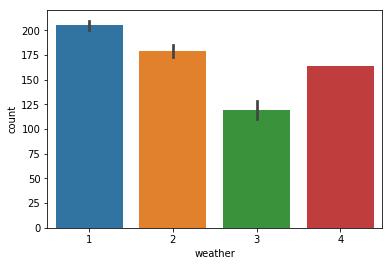

In [11]:
sns.barplot(data=train, x="weather", y="count")

### 2-2) 이 시각화로 발견할 수 있는 사실

1. 날씨(```weather```)가 안 좋을수록 자전거 대여량이 낮아짐.
2. 날씨가 4인 경우, 즉 아주 많은 비가 오거나 우박이 내리는 경우에 자전거를 많이 빌리는 현상이 보임.
3. 그리고 시각화에서 신뢰 구간(confidence interval)이 날씨가 4인 경우에는 보이지 않음. 뭔가 다른 현상이 발생하고 있음을 알 수 있음.

### 2-3) 예측 모델 계선 가능성

1. 날씨(```weather```) 컬럼값이 1 ~ 3이므로 따로 날씨를 전처리 하지 않더라도 feature 로 사용 가능.
2. 4번 날씨의 경우 실제 엑셀로 확인 결과 train 에서 1건, test 2건이 발견됨.
3. 4의 데이터를 3으로 바꾸는것도 나쁘지 않다고 생각함.

### 3. windspeed

### 3-1) 시각화를 하기 전 예상

1. 연속형(continuous) 자료이므로 분포를 시각화하면 전형적인 정규 분포를 보일 것임.
2. 완벽한 정규 분포가 나오지는 않을 것이며 한쪽으로 치우쳐 있을 것 같음.
3. 바람이 너무 많이 불면 자전거를 덜 빌릴 것 같음.

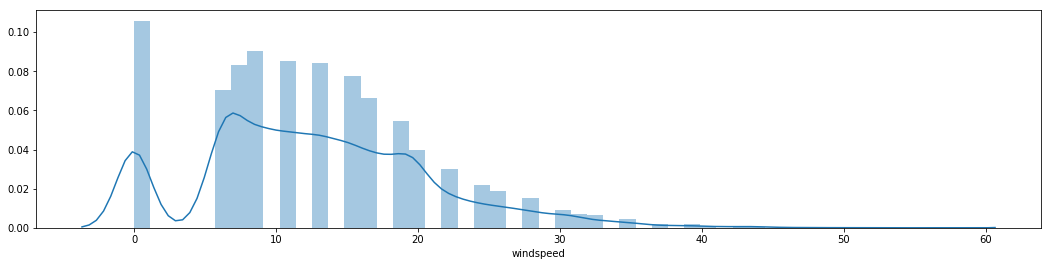

In [12]:
# windspeed 데이터의 전체 분포(distribution)을 시각화
plt.figure(figsize = (18, 4))

sns.distplot(train["windspeed"])

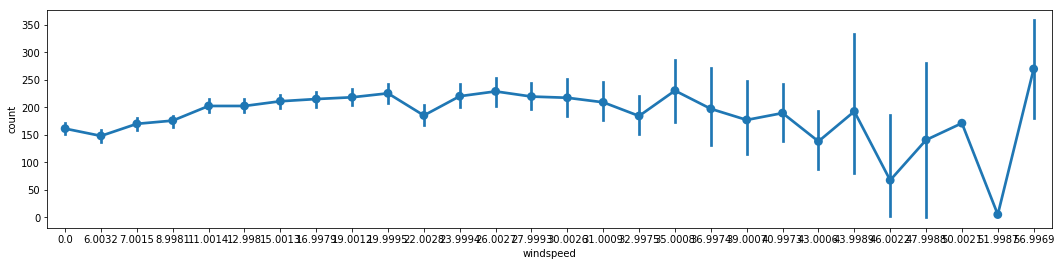

In [13]:
# x축에는 풍속(windspeed)을, y축에는 자전거 대여량(count)
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="windspeed", y="count")

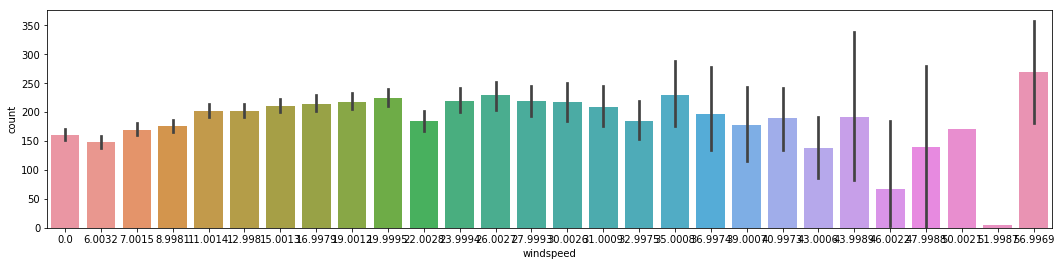

In [14]:
# x축에는 풍속(windspeed)을, y축에는 자전거 대여량(count)
plt.figure(figsize = (18, 4))

sns.barplot(data=train, x="windspeed", y="count")

데이터중 소숫점이 차지하는 부분이 많아 이 부분을 정리를 하는 것도 괜찮을 것 같음.

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


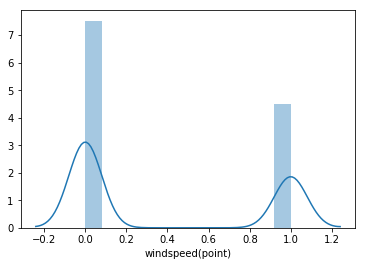

In [15]:
# 풍속을 정수형(int)으로 변환하여 사용
# 소숫점만 모은 컬럼을 windspeed(point)라는 이름의 새로운 컬럼에 할당
train["windspeed(point)"] = train["windspeed"] - train["windspeed"].astype('int')

# windspeed(point) 컬럼의 중복을 제거하여 종류를 출력하며, 소수점 3자리까지 표시
print(train["windspeed(point)"].unique().round(3))

sns.distplot(train["windspeed(point)"])

### 3-2) 이 시각화로 발견할 수 있는 사실

1. 정규 분포이지만 값이 연속적(continuous)이지 않고 군데군데 비어있는 구간이 보여서 범주형(categorical) 데이터 같음.
2. 풍속이 0인 경우가 너무 많음.

### 3-3) 예측 모델 계선 가능성

1. 풍속(windspeed) 데이터를 그대로 사용해도 괜찮을 것 같음.
2. 풍속이 0인 경우가 너무 많은데 이를 0.6의 수치와 같은 값으로 넣고 예측을 해야 할것 같음.
3. 그것이 아니라면 0의 값이 오류라고 생각이 될 수도 있기 때문에 0이 나온 값의 날짜, 시간, 계절, 온도, 기온을 이용하여 비슷한 값을 넣을 수 있도록 해야 할것 같음.

### 4. temp

### 4-1) 시각화를 하기 전 예상

1. 온도가 너무 낮거나 높을 경우 빌리는 정도가 적어서 연속성 데이터로서 정규 분포의 모습을 보일것 같음.
2. 몇몇 아웃라이어가 존재하거나, 온도가 특별히 많이 높아서 분포의 오른쪽이 길게 늘어지는 현상이 발생 할 수도 있음.
3. 체감 온도로 분석을 해도 유사한 모습을 보일 것 같음.

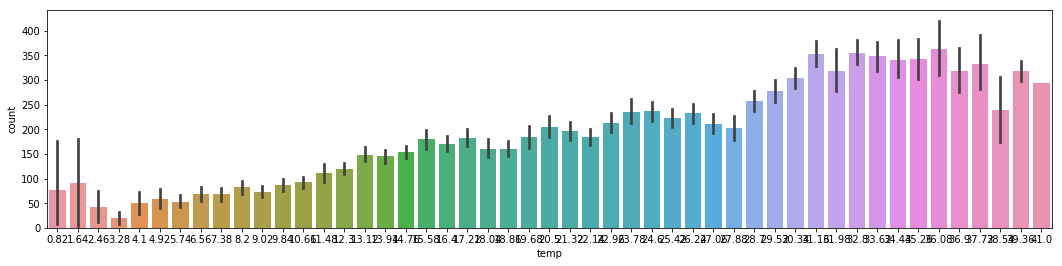

In [16]:
plt.figure(figsize = (18, 4))

sns.barplot(data=train, x="temp", y="count")

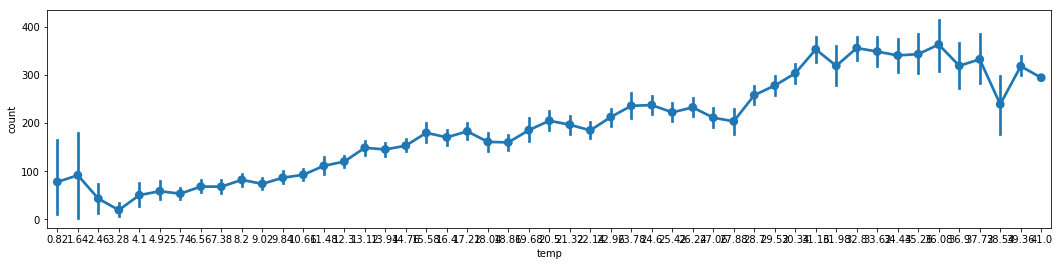

In [17]:
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="temp", y="count")

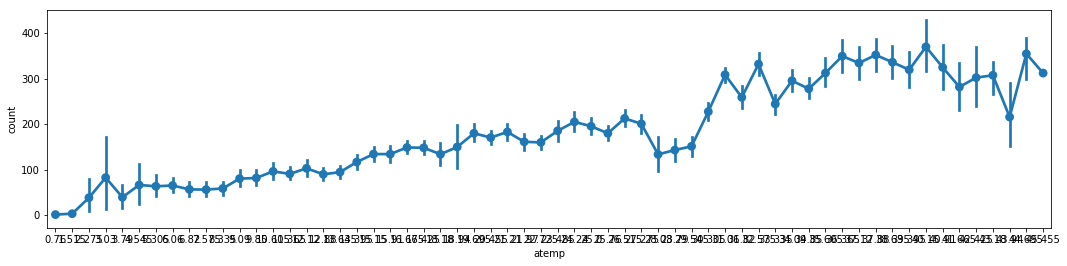

In [18]:
# 체감온도를 이용한 시각화
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="atemp", y="count")

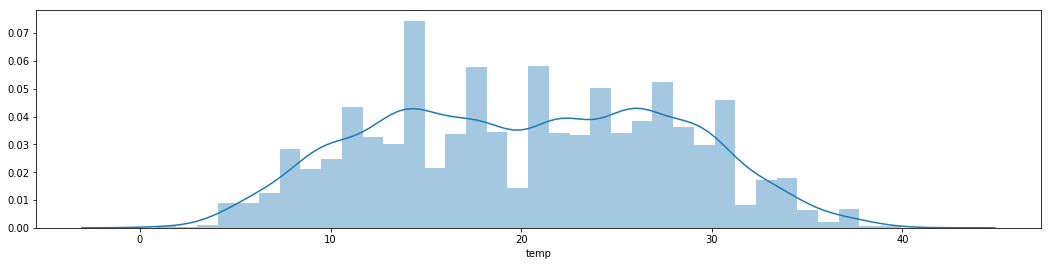

In [19]:
plt.figure(figsize = (18, 4))

sns.distplot(train["temp"])

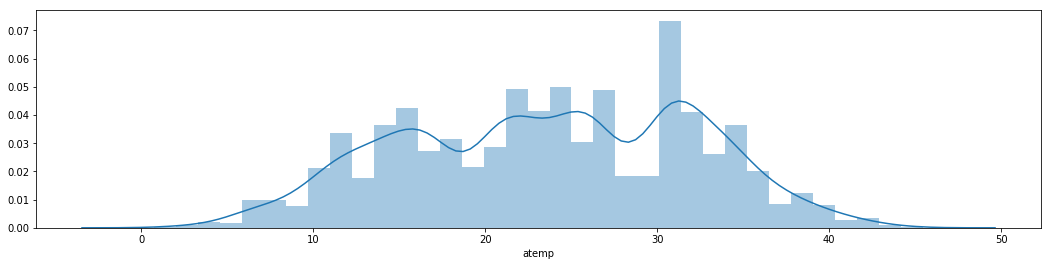

In [20]:
plt.figure(figsize = (18, 4))

sns.distplot(train["atemp"])

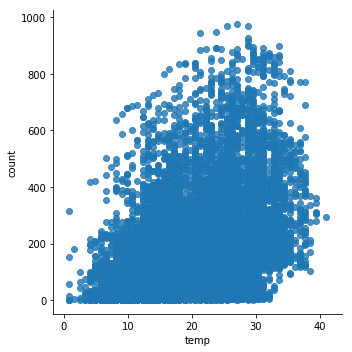

In [21]:
sns.lmplot(data=train, x="temp", y="count", fit_reg=False)

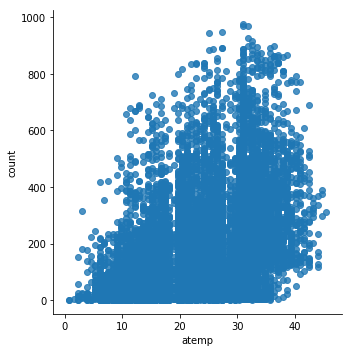

In [22]:
sns.lmplot(data=train, x="atemp", y="count", fit_reg=False)

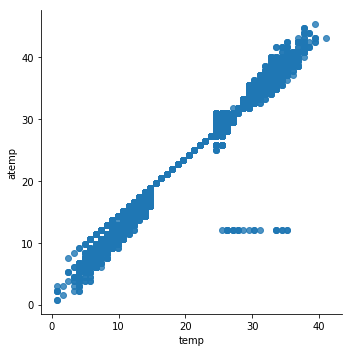

In [23]:
# 온도와 체감온도 와의 관계 시각화
sns.lmplot(data=train, x="temp", y="atemp", fit_reg=False)

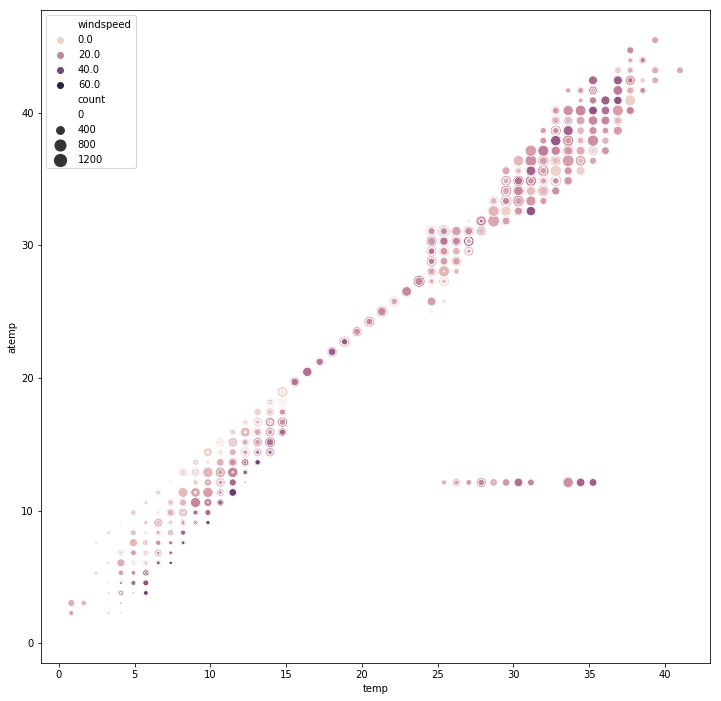

In [24]:
# 온도와 체감온도와의 관계를 횟수로 원의 크기, 풍속에 따라 원의 진하기로 표현
plt.figure(figsize=(12,12))

sns.scatterplot(data=train, x="temp", y="atemp", size="count", sizes=(0, 150), hue="windspeed")

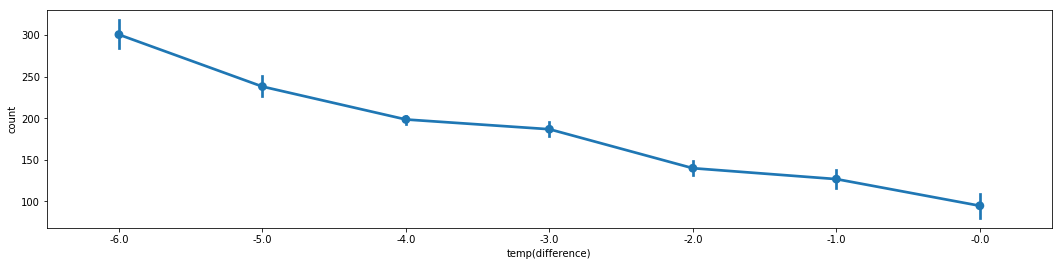

In [25]:
# 온도와 체감 온도의 차이에 따른 대여량 비교 시각화
train["temp(difference)"] = train["temp"] - train["atemp"]

train["temp(difference)"] = train["temp(difference)"].round()

train.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6
train.loc[train["temp(difference)"] > 0, "temp(difference)"] = 0


plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="temp(difference)", y="count")

### 4-2) 이 시각화로 발견할 수 있는 사실

1. 연속형 데이터로서 정규분포의 모습을 보일려고 하고 있음. 
2. 기온이 올라 갈 수록 count도 올라가므로 더워도 자전거를 탈만 한 것임을 알 수 있음.
3. 체감온도(atemp)가 온도(temp)보다 높을 경우 자전거를 더 많이 빌림.

### 4-3) 예측 모델 계선 가능성
1. 기온 데이터가 머신러닝 알고리즘이 예측하는데 도움이 될 것 같음.
2. 기온은 계절(season)과 연관성이 높아 둘을 결함 하는 것도 괜찮을 것 같음.
3. 체감 온도와 온도의 차이가 생기는 부분을 찾기 위해 체감 온도에 영향을 주는 습도(humidity)와 바람세기(windspeed)의 연관성 살펴 볼 것.

### 5. datetime-dayofweek

### 5-1) 시각화를 하기 전 예상

1. 요일이냐에 따라서 자전거 대여량이 다르게 시각화 될 것 같음.
2. 주말이라하더라도 토/일 차이와 월/금의 차이를 보일 것 같음.

In [26]:
train["datetime-dayofweek"] = train["datetime"].dt.day_name()

print(train.shape)
train[["datetime", "datetime-dayofweek"]]

(10886, 21)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,Saturday
1,2011-01-01 01:00:00,Saturday
2,2011-01-01 02:00:00,Saturday
3,2011-01-01 03:00:00,Saturday
4,2011-01-01 04:00:00,Saturday
5,2011-01-01 05:00:00,Saturday
6,2011-01-01 06:00:00,Saturday
7,2011-01-01 07:00:00,Saturday
8,2011-01-01 08:00:00,Saturday
9,2011-01-01 09:00:00,Saturday


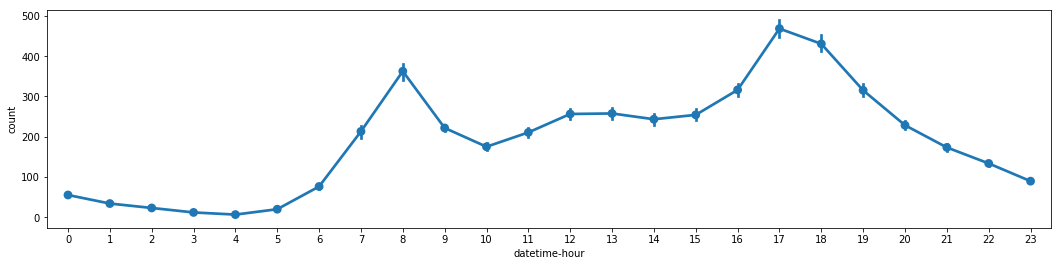

In [27]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count")

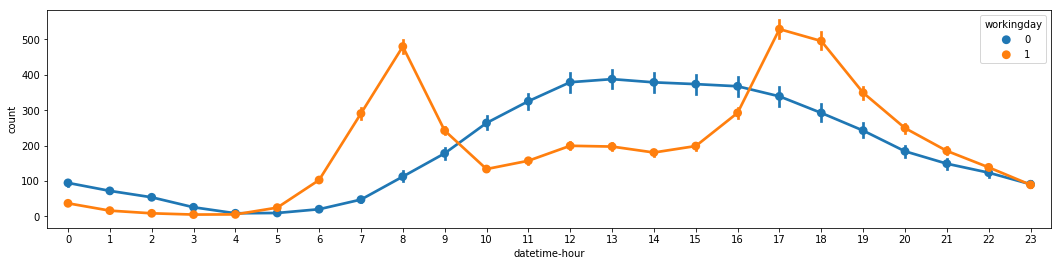

In [28]:
# 출퇴근 시간을 구분하여 시각화
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

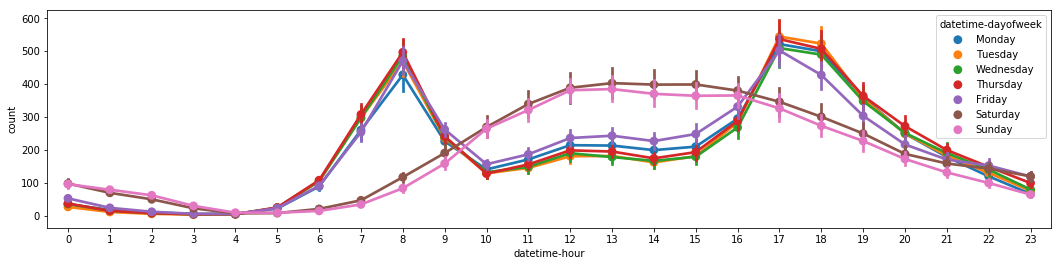

In [29]:
# 요일별 시각화
plt.figure(figsize=(18,4))

dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", hue_order=dayofweek_order)

### 5-2) 이 시각화로 발견할 수 있는 사실

1. 일요일이 토요일보다 자전거 대여량이 낮음. 출근 전날이라 그럴 수 있다고 생각됨.
2. 금요일 저녁이 다른 주중 저녁보다 대여량이 낮음.

### 5-3) 예측 모델 계선 가능성

1. 요일(datetime-dayofweek) 컬럼이 머신러닝 성능에 긍정적 영향을 줄것 같음.
2. 근무일(workingday)컬럼만 넣는 것 보다 요일(datetime-dayofweek) 컬럼이 더 나을 수 있음.
3. One Hot Encoding을 하는 것이 더 나을 것임.

In [30]:
# 나중에 학습을 쉽게 하기 위해 수정
train["datetime-dayofweek"] = train["datetime"].dt.day_name()

train["datetime-dayofweek(int)"] = train["datetime"].dt.dayofweek

print(train.shape)

train[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()

(10886, 22)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-01 00:00:00,Saturday,5
1,2011-01-01 01:00:00,Saturday,5
2,2011-01-01 02:00:00,Saturday,5
3,2011-01-01 03:00:00,Saturday,5
4,2011-01-01 04:00:00,Saturday,5


In [31]:
# test 데이터도 같이 수정
test["datetime-dayofweek"] = test["datetime"].dt.day_name()

test["datetime-dayofweek(int)"] = test["datetime"].dt.dayofweek

print(test.shape)

test[["datetime", "datetime-dayofweek", "datetime-dayofweek(int)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-20 00:00:00,Thursday,3
1,2011-01-20 01:00:00,Thursday,3
2,2011-01-20 02:00:00,Thursday,3
3,2011-01-20 03:00:00,Thursday,3
4,2011-01-20 04:00:00,Thursday,3


### 6. casual & registered

### 6-1) 시각화를 하기 전 예상

1. casual & registered 를 더한 것이 count 이기에 유사한 패턴이 나올 것임.
2. 허나 각각을 두고 보았을 경우 차이가 날 것으로 보임.
3. registered에 비해, casual 컬럼이 더 패턴이 어려울 것으로 보임.

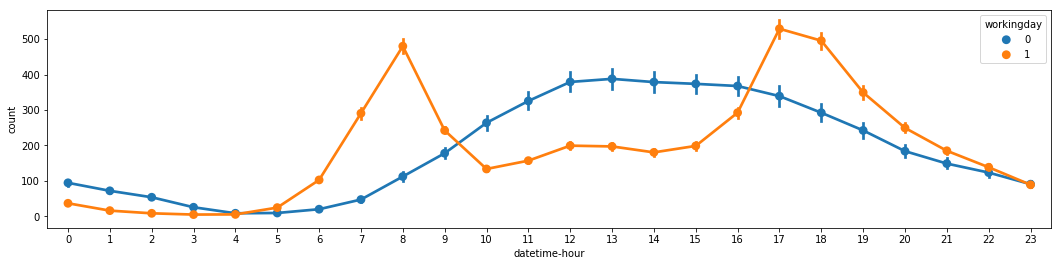

In [32]:
# working day 에 따른 count의 시각화
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

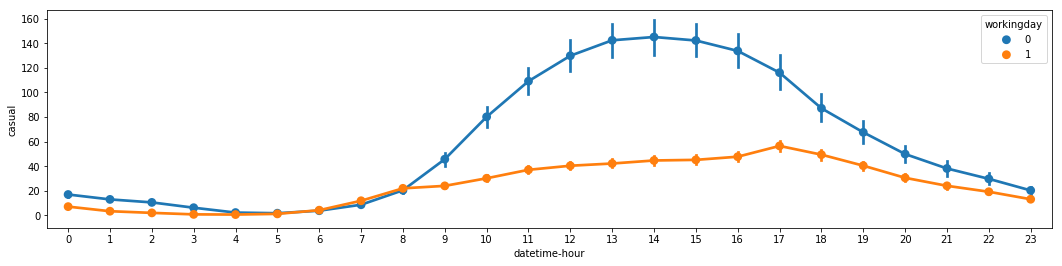

In [33]:
# working day 에 따른 registered의 시각화
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday")

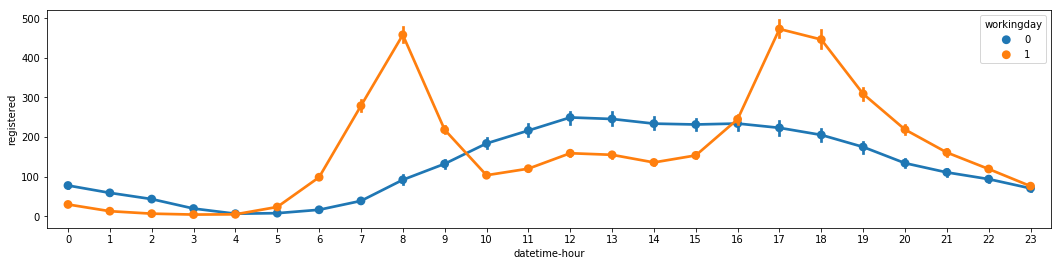

In [34]:
# working day 에 따른 casual의 시각화
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday")

### 6-2) 이 시각화로 발견할 수 있는 사실

1. 시간(datetime-hour)에 따른 자전거 대여량의 변화량을 비교해보니, 비회원과 회원의 차이가 많이 남.
2. registered은 주로 출퇴근시에 casual은 주로 주말에 자전거를 빌림.
3. casual보다는 registered가 자전거를 더 많이 빌림.

### 6-3) 예측 모델 계선 가능성

1. casual와 registered는 test 데이터에 넣을 수 없기 때문에 feature로 활용할 수 없음.
2. count을 예측하지 말고 casual과 registered를 각각 label로 간주하고 예측한 뒤 더 해 보기.

### 7. datetime-year & datetime-month

### 7-1) 시각화를 하기 전 예상

1. 년도 별로 성장하는지 안하는지 볼 수 있을 것이며, 계절별로 어떤 변화가 있을지 볼 수 있을 것임.

In [35]:
# 연도(datetime-year)와 월(datetime-month)를 앞뒤로 붙인 datetime-year_month라는 이름의 컬럼을 추가
train["datetime-year_month"] = train["datetime-year"].astype('str') + '-' + train["datetime-month"].astype('str')

print(train.shape)

train[["datetime", "datetime-year_month"]].head()

(10886, 23)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


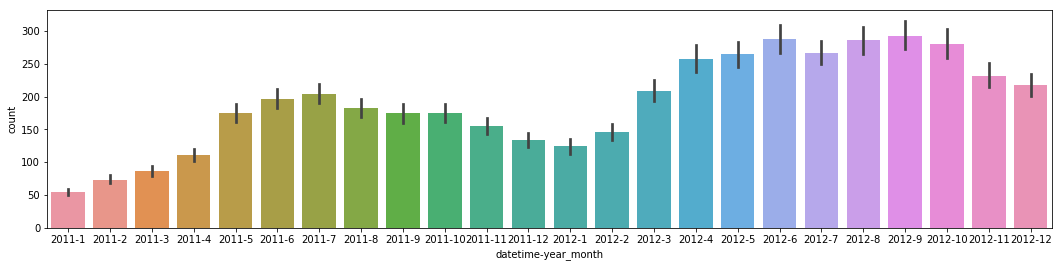

In [36]:
plt.figure(figsize = (18, 4))

sns.barplot(data=train, x="datetime-year_month", y="count")

### 7-2) 이 시각화로 발견할 수 있는 사실

1. 전반적으로 성장하고 있는 회사 임을 알 수 있음.

### 7-3) 예측 모델 계선 가능성

1. 트렌드의 개념을 반영해줄 필요가 있음. 2011년 1월부터 2012년 12월까지의 24개의 기간을 머신러닝 모델에 넣어주는 방법이 필요.
2. 아니면 아예 넣지 않기.

## Train

### 1. Feature, Label 지정

In [37]:
# feature 지정
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek(int)"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek(int)']

In [38]:
label_name = "count"
label_name

'count'

In [39]:
X_train = train[feature_names]

print(X_train.shape)

X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek(int)
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [40]:
X_test = test[feature_names]

print(X_test.shape)

X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek(int)
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


### 2. count, casaul, registered 다 따로 계산하기

In [41]:
# label_name을 활용해 train 데이터의 label을 가져옴.
y_train = train["count"]

print(y_train.shape)

y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [42]:
# count 로 예측하기 위한 사전 작업
y_train_count = train["count"]

print(y_train_count.shape)

y_train_count.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [43]:
y_train_log_count = np.log(y_train_count + 1)

print(y_train_log_count.shape)

y_train_log_count.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [44]:
# casual 로 예측하기 위한 사전 작업
y_train_casual = train["casual"]

print(y_train_casual.shape)

y_train_casual.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [45]:
y_train_log_casual = np.log(y_train_casual + 1)

print(y_train_log_casual.shape)

y_train_log_casual.head()

(10886,)


0    1.386294
1    2.197225
2    1.791759
3    1.386294
4    0.000000
Name: casual, dtype: float64

In [46]:
# registered 로 예측하기 위한 사전 작업
y_train_registered = train["registered"]

print(y_train_registered.shape)

y_train_registered.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [47]:
y_train_log_registered = np.log(y_train_registered + 1)

print(y_train_log_registered.shape)

y_train_log_registered.head()

(10886,)


0    2.639057
1    3.496508
2    3.332205
3    2.397895
4    0.693147
Name: registered, dtype: float64

In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10,
                              n_jobs=-1,
                              random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

### 3. Hyperparameter Tuning

### 3-1) Random Search(Coarse)

In [49]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_log_error

# n_estimators는 트리의 갯수
n_estimators = 300

# 랜덤 서치를 반복할 횟수
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장
coarse_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다.
for epoch in range(num_epoch):
    # 2에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당
    max_depth = np.random.randint(low = 2, high = 100)

    # 0.1에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당
    max_features = np.random.uniform(low = 0.1, high = 1.0)

    # Random Forest를 생성 이하 옵션
    # 1) n_estimators. 트리의 갯수
    # 2) max_depth. 트리의 깊이
    # 3) max_features. Feature Sampling
    # 4) n_jobs. 병렬처리 여부
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)

    # 주어진 모델(랜덤포레스트)를 활용하여 Cross Validation
    # Cross Validation을 할 때는 cross_val_predict라는 함수를 사용 이하 옵션
    # 1) model. 점수를 측정할 머신러닝 모델
    # 2) X_train. train 데이터의 feature
    # 3) y_train. train 데이터의 label
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수이며 count, casual, registered 컬럼 세 개를 따로 예측하되 log + 1 연산을 한 결과를 사용
    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산을 함으로서 다시 원래 자전거 대여량으로 변환
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 기하평균을 통해 하나로 합침.
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)

    # train 데이터의 label에 해당하는 y_train과, train 데이터의 label의 예측값인 y_predict를 활용하여 MSLE를 계산
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    # hyperparameter 탐색 결과를 딕셔너리화
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장
    coarse_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)

coarse_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 52, max_features = 0.779767, Score = 0.34967
 1 n_estimators = 300, max_depth = 10, max_features = 0.237062, Score = 0.57603
 2 n_estimators = 300, max_depth = 57, max_features = 0.264987, Score = 0.49061
 3 n_estimators = 300, max_depth = 13, max_features = 0.705118, Score = 0.35692
 4 n_estimators = 300, max_depth = 62, max_features = 0.432161, Score = 0.38581
 5 n_estimators = 300, max_depth = 93, max_features = 0.375148, Score = 0.38581
 6 n_estimators = 300, max_depth = 61, max_features = 0.832978, Score = 0.34942
 7 n_estimators = 300, max_depth = 15, max_features = 0.443190, Score = 0.39045
 8 n_estimators = 300, max_depth =  5, max_features = 0.146891, Score = 0.95059
 9 n_estimators = 300, max_depth = 51, max_features = 0.476693, Score = 0.36635
10 n_estimators = 300, max_depth = 77, max_features = 0.711274, Score = 0.35140
11 n_estimators = 300, max_depth = 31, max_features = 0.849730, Score = 0.34940
12 n_estimators = 300, max_depth = 33, m

,epoch,max_depth,max_features,n_estimators,score
11,11,31,0.849730,300,0.349397
63,63,71,0.823738,300,0.349424
84,84,62,0.898503,300,0.349424
94,94,40,0.820885,300,0.349424
6,6,61,0.832978,300,0.349424
90,90,81,0.832965,300,0.349424
68,68,82,0.859560,300,0.349424
70,70,99,0.893363,300,0.349424
78,78,87,0.805608,300,0.349672
0,0,52,0.779767,300,0.349672


* max_depth = 31개 ~ 100개
* max_features = 0.77 ~ 1.0

### 3-2) Random Search(Fine)

In [57]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_log_error

n_estimators = 300

num_epoch = 100

fine_hyperparameters_list = []

for epoch in range(num_epoch):

    max_depth = np.random.randint(low = 31, high = 100)

    max_features = np.random.uniform(low = 0.77, high = 1.0)

    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)

    y_predict_log_casual = cross_val_predict(model, X_train, y_train_log_casual, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train_log_registered, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train_log_count, cv = 20)

    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

 
    fine_hyperparameters_list.append(hyperparameters)

   
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

fine_hyperparameters_list = pd.DataFrame.from_dict(fine_hyperparameters_list)

fine_hyperparameters_list = fine_hyperparameters_list.sort_values(by="score")

print(fine_hyperparameters_list.shape)

fine_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 71, max_features = 0.899214, Score = 0.34942
 1 n_estimators = 300, max_depth = 68, max_features = 0.947241, Score = 0.34942
 2 n_estimators = 300, max_depth = 44, max_features = 0.955058, Score = 0.34942
 3 n_estimators = 300, max_depth = 55, max_features = 0.919650, Score = 0.34942
 4 n_estimators = 300, max_depth = 94, max_features = 0.771607, Score = 0.34942
 5 n_estimators = 300, max_depth = 75, max_features = 0.839946, Score = 0.34942
 6 n_estimators = 300, max_depth = 80, max_features = 0.926769, Score = 0.34942
 7 n_estimators = 300, max_depth = 93, max_features = 0.860283, Score = 0.34942
 8 n_estimators = 300, max_depth = 56, max_features = 0.836026, Score = 0.34942
 9 n_estimators = 300, max_depth = 65, max_features = 0.854100, Score = 0.34942
10 n_estimators = 300, max_depth = 73, max_features = 0.905366, Score = 0.34942
11 n_estimators = 300, max_depth = 70, max_features = 0.953589, Score = 0.34942
12 n_estimators = 300, max_depth = 95, m

,epoch,max_depth,max_features,n_estimators,score
0,0,71,0.899214,300,0.349424
72,72,76,0.952380,300,0.349424
71,71,87,0.785913,300,0.349424
70,70,48,0.971944,300,0.349424
69,69,35,0.774679,300,0.349424
68,68,97,0.927268,300,0.349424
67,67,99,0.877643,300,0.349424
66,66,45,0.976881,300,0.349424
65,65,95,0.854002,300,0.349424
64,64,49,0.835300,300,0.349424


In [58]:
# 가장 score가 낮게 나온(=좋은 정확도가 나온) 하이퍼패러미터를 가져옴
best_hyperparameters = fine_hyperparameters_list.iloc[0]

# best_hyperparameters에서 max_depth 하이퍼패러미터만 가져옴
best_max_depth = best_hyperparameters["max_depth"]

# best_hyperparameters에서 max_features 하이퍼패러미터만 가져옴.
best_max_features = best_hyperparameters["max_features"]

print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

max_depth(best) = 71.0, max_features(best) = 0.899214


## Predict

In [59]:
from sklearn.ensemble import RandomForestRegressor

best_n_estimators = 3000

model = RandomForestRegressor(n_estimators = best_n_estimators,
                              max_depth = best_max_depth,
                              max_features = best_max_features,
                              random_state = 37,
                              n_jobs = -1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=71.0,
           max_features=0.8992141932362977, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [60]:
# 머신러닝 모델을 학습하되, log + 1 연산을 한 비회원의 자전거 대여량(casual)을 label로 지정
model.fit(X_train, y_train_log_casual)

# 이 모델로 test 데이터의 log + 1 연산을 한 비회원의 자전거 대여량(casual)을 예측
log_casual_predictions = model.predict(X_test)

# 머신러닝 모델을 학습하되, log + 1 연산을 한 회원의 자전거 대여량(registered)을 label로 지정
model.fit(X_train, y_train_log_registered)

# 이 모델로 test 데이터의 log + 1 연산을 한 회원의 자전거 대여량(registered)을 예측
log_registered_predictions = model.predict(X_test)

# 머신러닝 모델을 학습하되, log + 1 연산을 한 자전거 대여량(count)을 label로 지정
model.fit(X_train, y_train_log_count)

# 이 모델로 test 데이터의 log + 1 연산을 한 자전거 대여량(count)을 예측
log_count_predictions = model.predict(X_test)

# 세 개의 예측값에 전부 exp - 1 연산을 해서 원래 자전거 대여량으로 변환
casual_predictions = np.exp(log_casual_predictions) - 1
registered_predictions = np.exp(log_registered_predictions) - 1
count_predictions = np.exp(log_count_predictions) - 1

# 이 자전거 대여량을 기하평균을 사용하여 하나로 합치고 결과를 predictions 이라는 값에 할당
predictions = np.sqrt((casual_predictions + registered_predictions) * count_predictions)

print(predictions.shape)

predictions

(6493,)


array([ 11.61726049,   4.96380011,   2.84136734, ..., 100.03377644,
        96.15805063,  47.05858235])

## Submit

In [61]:
submission = pd.read_csv("data/sampleSubmission.csv")

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [62]:
submission["count"] = predictions

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.617260
1,2011-01-20 01:00:00,4.963800
2,2011-01-20 02:00:00,2.841367
3,2011-01-20 03:00:00,2.735455
4,2011-01-20 04:00:00,2.347133


In [64]:
submission.to_csv("baseline-script.csv", index=False)